# AUC

In [41]:
from sklearn.metrics import roc_auc_score

logits = [0.2, 0.2, 0.3, 0.1, 0.1, 0.6, 0.8, 0.8, 0.9, 0.7]
y_true = [0, 0, 1, 0, 0, 0, 0, 1, 1, 1]

roc_auc_score(y_true, logits)

0.8541666666666667

AUC: Area Under the Curve(ROC Curve: Receiver Operating characteristic Curve)

纵坐标：TPR 真正例率 (TP 在 所有真正的positive 的含量) = recall = sensitivity
$$ TPR = \frac{TP}{TP + FN} $$

横坐标：FPR 假正例率 (FP 在 所有真正的negative 的含量) = 1 - specificity
$$ FPR = \frac{FP}{FP + TN} $$

**计算方法：**
1. 算面积。每个阈值会在坐标上对应一个点，那么把图画出来求积分就行。阈值的粒度与logits对应
2. 把所有logits排序，真正的negative在真正positive前面的概率。(注意相同logits但真实值不一样的情况)

## Method 1

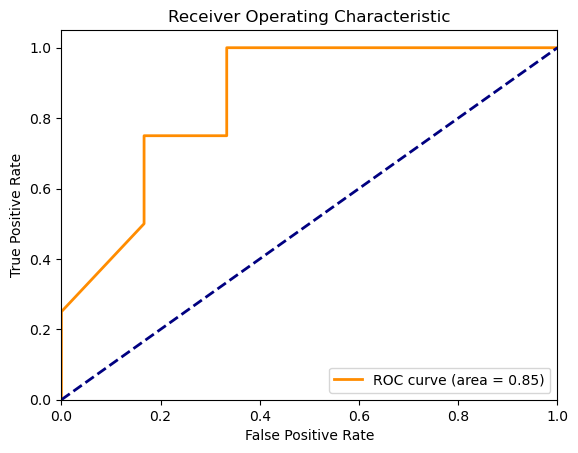

In [43]:
# 例子

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# 计算 FPR, TPR, 和 阈值
fpr, tpr, thresholds = roc_curve(y_true, logits)

# 计算 AUC
roc_auc = auc(fpr, tpr)

# 绘制 ROC 曲线
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [40]:
# 方法1

def my_roc_1(y_true, y_pred):
    n = len(y_true)
    thresholds = [float('inf')] + sorted(list(set(y_pred)), reverse=True)
    
    def cal_TPR_FPR(threshold):
        TP = 0
        FN = 0
        FP = 0
        TN = 0
        for i in range(n):
            if y_true[i]:
                if y_pred[i] < threshold:
                    FN += 1
                else:
                    TP += 1
            else:
                if y_pred[i] < threshold:
                    TN += 1
                else:
                    FP += 1
        return TP / (TP + FN), FP / (FP + TN)
    
    tprs, fprs = [], []
    for i in thresholds:
        TPR, FPR = cal_TPR_FPR(i)
        tprs.append(TPR)
        fprs.append(FPR)
    
    area = 0
    for i in range(len(tprs) - 1):
        area += (fprs[i + 1] - fprs[i]) * (tprs[i] + tprs[i + 1]) / 2
    return area

my_roc_1(y_true, logits)

0.8541666666666666

## Method 2

In [42]:
# 方法2

def my_roc_2(y_true, y_pred):
    n = len(y_true)
    tmp = [[y_pred[i], y_true[i]] for i in range(n)]
    tmp.sort(key=lambda x: x[0])
    c = 0
    s = 0

    for i in range(n - 1):
        for j in range(i + 1, n):
            if tmp[i][1]:
                if not tmp[j][1]:
                    if tmp[i][0] == tmp[j][0]:      # 若相同的logits但true不同，那就加0.5
                        c += 0.5
                    s += 1
            else:
                if tmp[j][1]:
                    if tmp[i][0] == tmp[j][0]:
                        c += 0.5
                    else:
                        c += 1
                    s += 1

    return c / s

my_roc_2(y_true, logits)


0.8541666666666666